In [1]:
library(targets)
library(tarchetypes)
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [92]:
da_results = tar_read("combined_da_results_obob5v5")
da_results %>% head

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR,polarity,labels,labels_fraction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63...1,5.175528,12.75419,65.87486,2.712965e-11,6.592504e-09,63,6.856218e-09,pos,a1_Tany__Astrocytes,1
93...2,4.883802,12.97953,50.94093,1.324004e-09,1.608665e-07,93,1.592806e-07,pos,a1_Tany__Astrocytes,1
214...3,3.576113,12.47521,33.10595,2.990955e-07,2.422673e-05,214,2.576412e-05,pos,a1_Tany__Astrocytes,1
118...4,3.401746,12.73492,31.07434,5.936490e-07,3.606418e-05,118,3.781441e-05,pos,a1_Tany__Astrocytes,1
19...5,3.177160,13.10128,23.56111,8.712993e-06,4.234514e-04,19,4.260118e-04,pos,a1_Tany__Astrocytes,1
58...6,2.661283,13.13157,21.17582,2.161802e-05,8.755300e-04,58,8.618807e-04,pos,a1_Tany__Astrocytes,1


Converting group.by to factor...



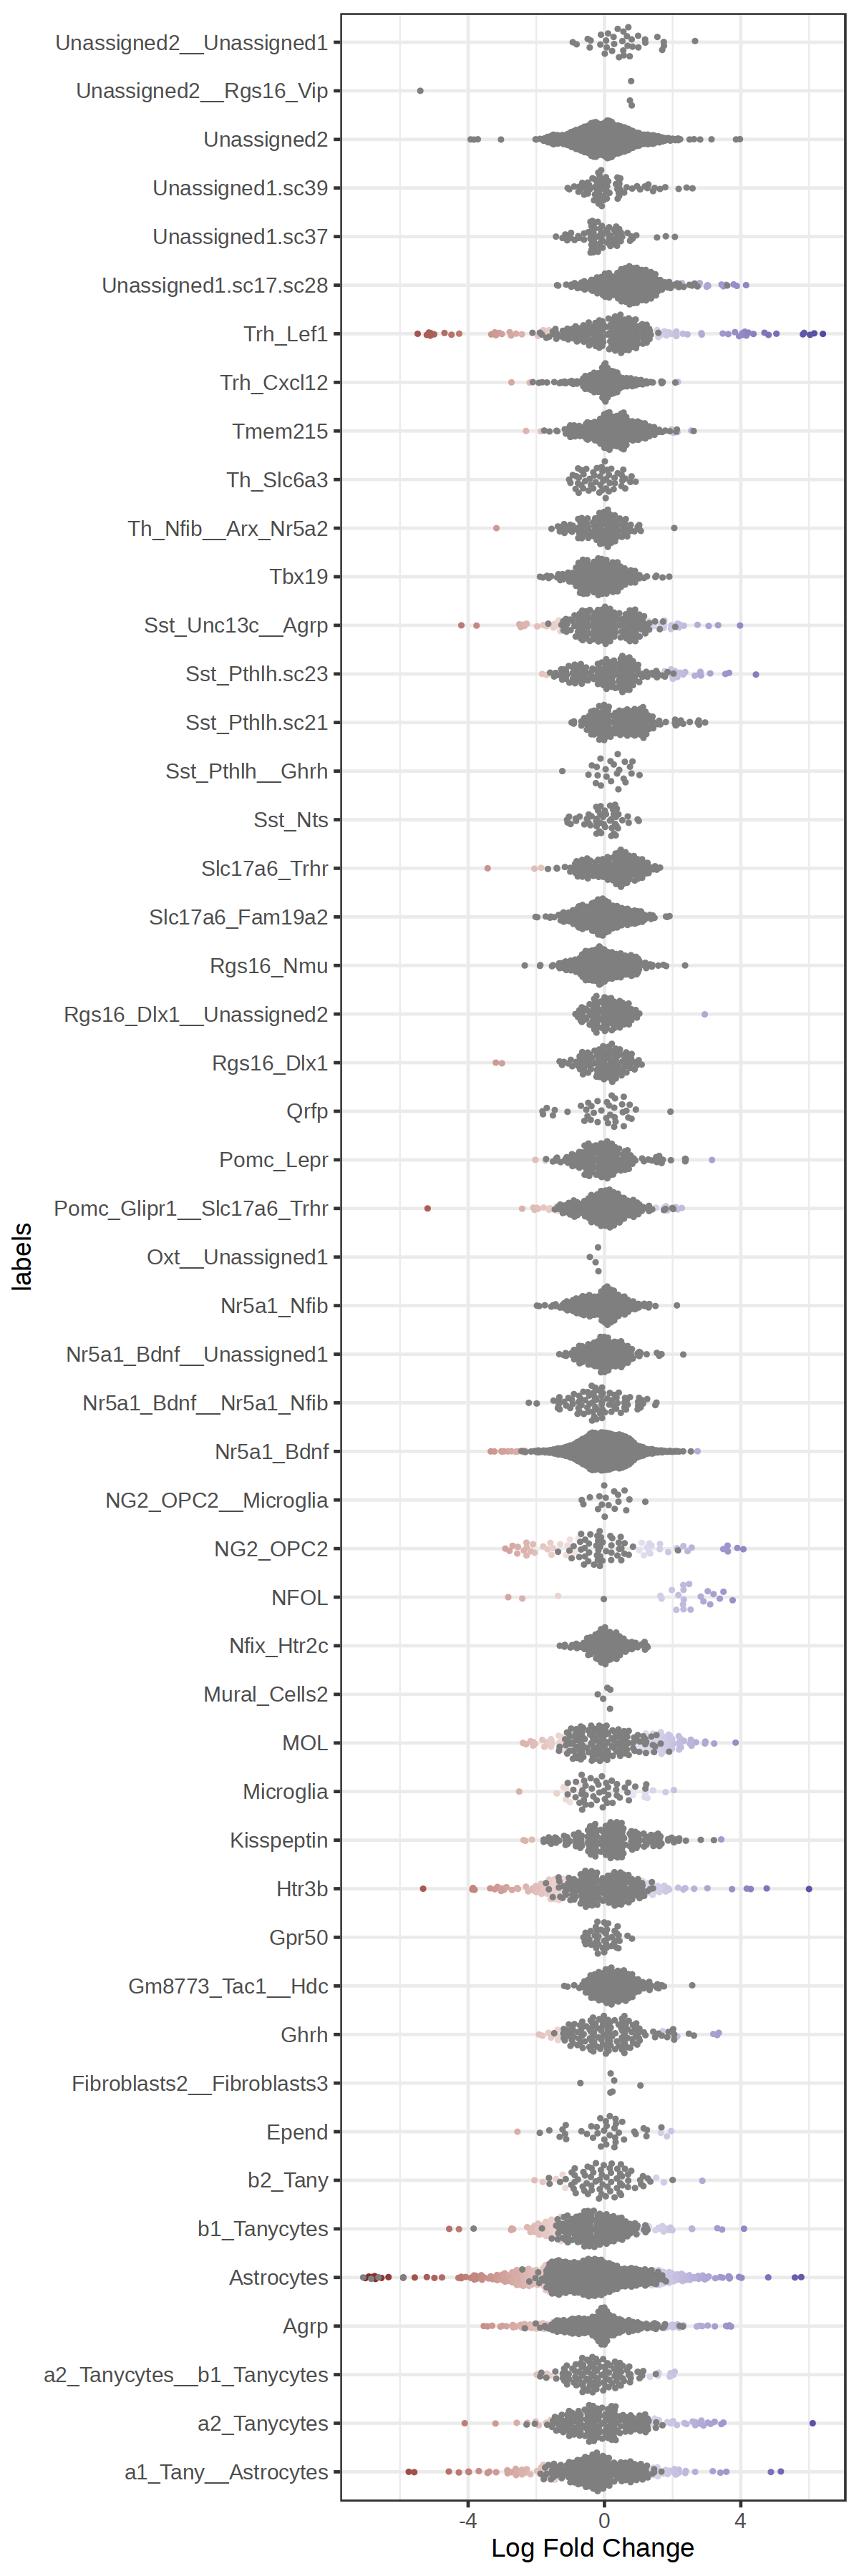

In [95]:
options(repr.plot.width=10, repr.plot.height=30)
miloR::plotDAbeeswarm(da_results, group.by='labels')

In [103]:
da_summary = da_results %>%
group_by(labels, polarity) %>%
summarise(n = n()) %>%
arrange(desc(labels))
da_summary %>% head

`summarise()` has grouped output by 'labels'. You can override using the
`.groups` argument.


labels,polarity,n
<chr>,<chr>,<int>
Unassigned2__Unassigned1,none,35
Unassigned2__Rgs16_Vip,none,4
Unassigned2,none,831
Unassigned1.sc39,none,70
Unassigned1.sc37,none,70
Unassigned1.sc17.sc28,none,250


In [107]:
da_label_groups = da_results %>%
group_by(labels) %>%
summarise(n_group = n()) %>%
arrange(desc(labels))


In [110]:
da_summary = merge(da_summary, da_label_groups)
da_summary %>% head

,labels,n_group,polarity,n
,<chr>,<int>,<chr>,<int>
1,a1_Tany__Astrocytes,243,neg,37
2,a1_Tany__Astrocytes,243,none,183
3,a1_Tany__Astrocytes,243,pos,23
4,a2_Tanycytes,190,neg,8
5,a2_Tanycytes,190,none,160
6,a2_Tanycytes,190,pos,22


In [112]:
da_summary = da_summary %>% mutate(pct_group = n/n_group)
da_summary %>% head

,labels,n_group,polarity,n,pct_group
,<chr>,<int>,<chr>,<int>,<dbl>
1,a1_Tany__Astrocytes,243,neg,37,0.15226337
2,a1_Tany__Astrocytes,243,none,183,0.75308642
3,a1_Tany__Astrocytes,243,pos,23,0.09465021
4,a2_Tanycytes,190,neg,8,0.04210526
5,a2_Tanycytes,190,none,160,0.84210526
6,a2_Tanycytes,190,pos,22,0.11578947


In [138]:
da_summary_sum = da_summary %>% 
  filter(polarity == 'none') %>%
  mutate(pct_group_changed = (n_group - n)/n_group) %>%
  select(-c(polarity, pct_group, n)) %>%
  arrange(desc(pct_group_changed), desc(n_group))
da_summary_sum
  

labels,n_group,pct_group_changed
<chr>,<int>,<dbl>
NFOL,24,0.958333333
NG2_OPC2,90,0.477777778
Astrocytes,607,0.332784185
MOL,189,0.317460317
Htr3b,244,0.307377049
Microglia,59,0.254237288
b1_Tanycytes,233,0.253218884
Trh_Lef1,214,0.252336449
a1_Tany__Astrocytes,243,0.246913580


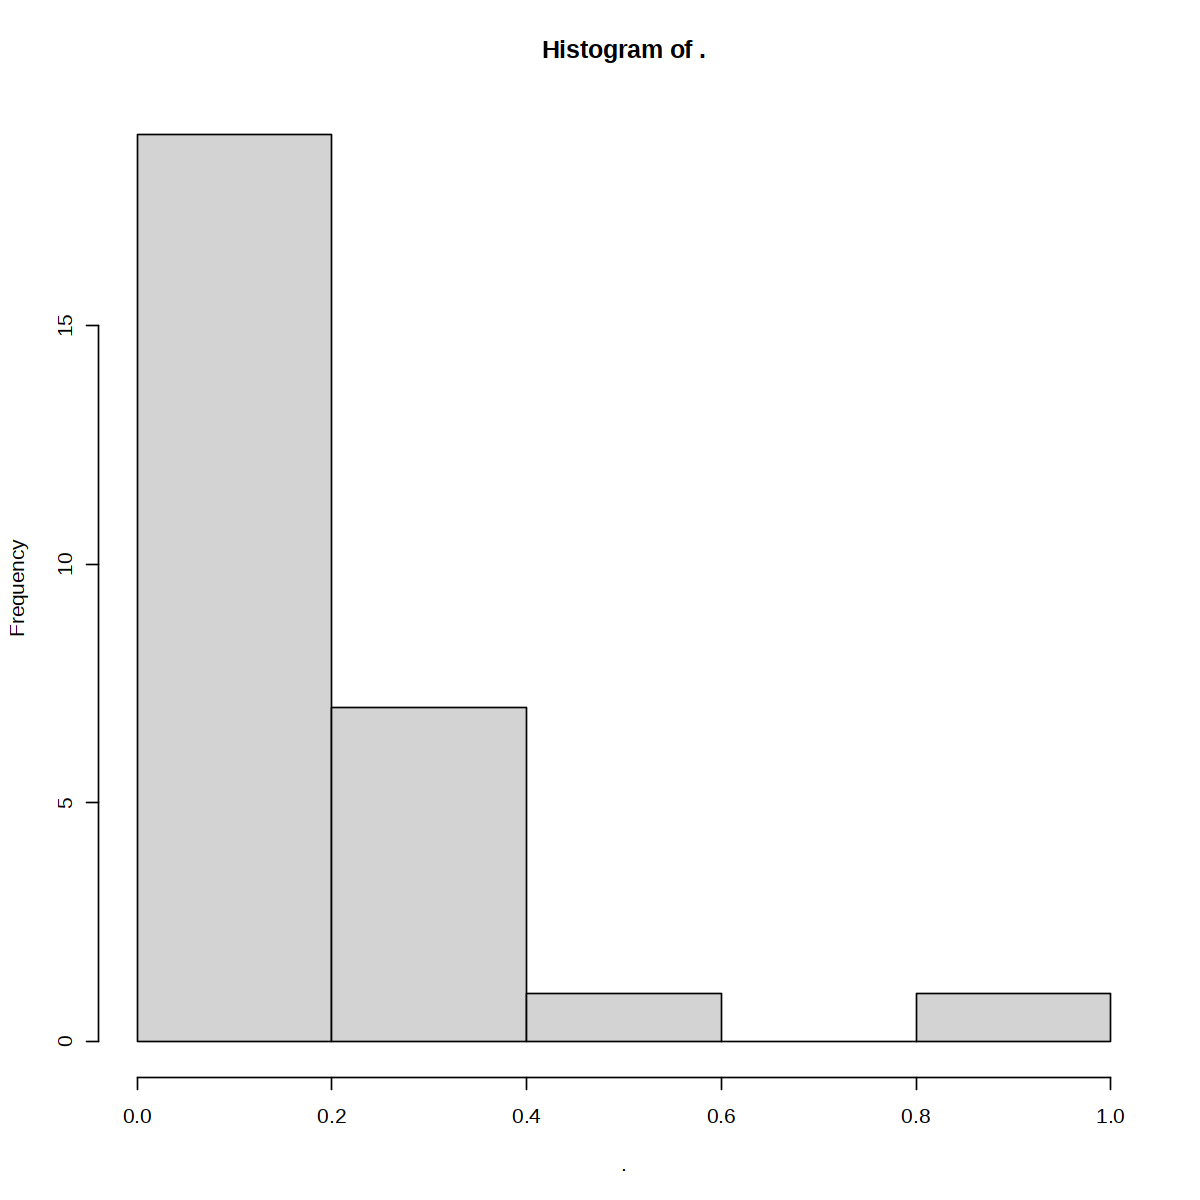

In [122]:
options(repr.plot.width=10, repr.plot.height=10)
da_summary_sum %>% filter(pct_group_changed > 0) %>% pull(pct_group_changed) %>% hist()

In [134]:
da_results$labels = da_summary_sum %>% arrange(pct_group_changed, n_group) %>% pull(labels) %>% factor(da_results$labels, levels=.)

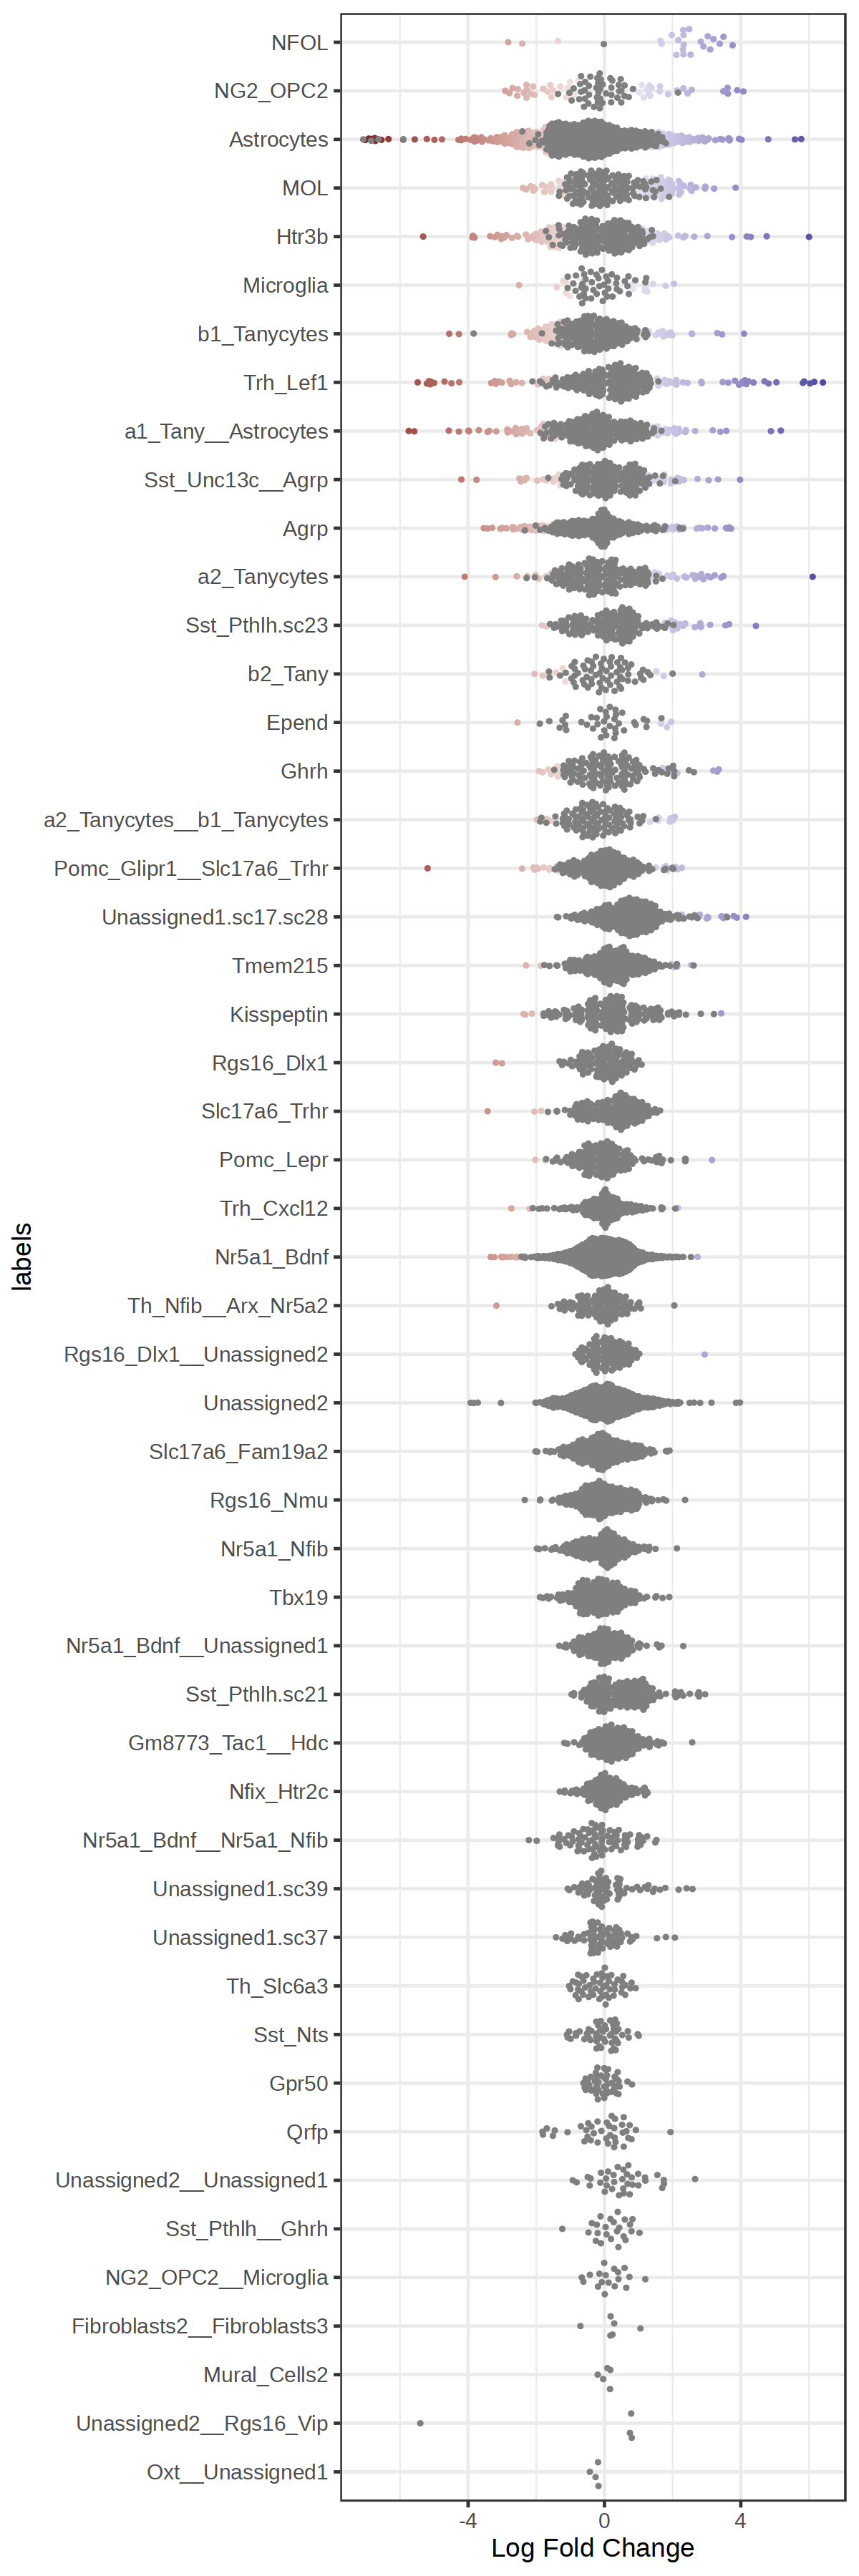

In [135]:
options(repr.plot.width=10, repr.plot.height=30)
miloR::plotDAbeeswarm(da_results, group.by='labels')

In [139]:
da_summary_sum %>% print

                       labels n_group pct_group_changed
1                        NFOL      24       0.958333333
2                    NG2_OPC2      90       0.477777778
3                  Astrocytes     607       0.332784185
4                         MOL     189       0.317460317
5                       Htr3b     244       0.307377049
6                   Microglia      59       0.254237288
7                b1_Tanycytes     233       0.253218884
8                    Trh_Lef1     214       0.252336449
9         a1_Tany__Astrocytes     243       0.246913580
10           Sst_Unc13c__Agrp     202       0.183168317
11                       Agrp     316       0.167721519
12               a2_Tanycytes     190       0.157894737
13             Sst_Pthlh.sc23     160       0.131250000
14                    b2_Tany      74       0.108108108
15                      Epend      41       0.097560976
16                       Ghrh     135       0.096296296
17 a2_Tanycytes__b1_Tanycytes     111       0.09